# Regression challenge


## Libraries


In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data


In [87]:
# URL du dépôt GitHub
repo_url = 'https://github.com/JorisCaudard/M2_Data_Challenge.git'
repo_name = 'M2-Data_challenge'

In [88]:
DATA_FOLDER = "../Data/Regression"

TRAIN_FILE_NAME = "train.parquet"
TEST_FILE_NAME = "test.parquet"
NAIVE_SUBMISSION_FILE_NAME = "naive_submission.parquet"
SUBMISSION_FILE_NAME = "submission.parquet"

In [89]:
dfTrain = pd.read_parquet(os.path.join(DATA_FOLDER, TRAIN_FILE_NAME))
dfTest = pd.read_parquet(os.path.join(DATA_FOLDER, TEST_FILE_NAME))
dfSubmission = pd.read_parquet(os.path.join(DATA_FOLDER, NAIVE_SUBMISSION_FILE_NAME))

## Data Exploration


### Data Viz


In [90]:
dfTrain.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
0,1,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,1.0,N,1,19.1,3.5,0.5,4.80,0.0,1.0,2.5,0.0,40.734576,-74.002875,40.768615,-73.965635
1,2,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,1.0,N,1,5.8,2.5,0.5,2.46,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.780436,-73.957012
2,2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,1.0,N,1,38.7,0.0,0.5,3.00,0.0,1.0,2.5,0.0,40.717773,-74.007880,40.780436,-73.957012
3,2,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,1.0,N,1,10.0,1.0,0.5,2.25,0.0,1.0,2.5,0.0,40.720889,-73.996919,40.747746,-73.978492
4,2,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,1.0,N,1,10.0,0.0,0.5,3.50,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.747746,-73.978492


In [91]:
dfTrain.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
count,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.759540,2024-01-17 01:37:59.341700,2024-01-17 01:53:39.024740,1.335090,3.213008,1.998210,1.186610,18.044264,1.538507,0.497315,3.430985,0.525877,0.999882,2.335125,0.140857,40.752187,-73.965628,40.754760,-73.971940
min,1.000000,2023-12-31 23:56:46,2024-01-01 00:03:50,0.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.576961,-74.174002,40.528686,-74.187679
25%,2.000000,2024-01-09 15:34:38,2024-01-09 15:50:20.750000,1.000000,1.000000,1.000000,1.000000,8.600000,0.000000,0.500000,1.000000,0.000000,1.000000,2.500000,0.000000,40.740439,-73.989845,40.740337,-73.989845
50%,2.000000,2024-01-17 11:32:54.500000,2024-01-17 11:51:50,1.000000,1.690000,1.000000,1.000000,12.800000,1.000000,0.500000,2.800000,0.000000,1.000000,2.500000,0.000000,40.758028,-73.977698,40.758028,-73.977698
75%,2.000000,2024-01-24 18:09:36,2024-01-24 18:28:48.500000,1.000000,3.100000,1.000000,1.000000,19.800000,2.500000,0.500000,4.200000,0.000000,1.000000,2.500000,0.000000,40.773633,-73.965146,40.773633,-73.961764
max,2.000000,2024-01-31 23:59:07,2024-02-01 10:57:24,7.000000,53.640000,99.000000,4.000000,214.800000,11.750000,0.500000,99.000000,49.260000,1.000000,2.500000,1.750000,40.899528,-73.726655,40.899528,-73.711025
std,0.427365,NaN,NaN,0.847745,4.219928,9.594546,0.458398,15.839824,1.788004,0.036542,3.686474,2.020583,0.009412,0.620490,0.476090,0.032148,0.048564,0.031182,0.036295


In [92]:
dfTest.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
0,2,2024-01-05 11:38:31,2024-01-05 12:07:29,1.0,9.89,1.0,N,1,42.9,0.0,0.5,6.94,1.0,2.5,0.0,40.753513,-73.988787,40.653612,-73.977982
1,2,2024-01-26 10:17:37,2024-01-26 10:30:43,1.0,1.06,1.0,N,1,12.1,0.0,0.5,0.00,1.0,2.5,0.0,40.780436,-73.957012,40.768615,-73.965635
2,2,2024-01-10 10:05:25,2024-01-10 10:24:03,1.0,1.03,1.0,N,1,16.3,0.0,0.5,0.00,1.0,2.5,0.0,40.748497,-73.992438,40.759818,-73.984197
3,2,2024-01-19 14:56:43,2024-01-19 15:20:46,1.0,2.99,1.0,N,1,21.9,0.0,0.5,0.00,1.0,2.5,0.0,40.766238,-73.995135,40.775932,-73.946510
4,2,2024-01-10 17:09:58,2024-01-10 17:19:46,1.0,1.25,1.0,N,1,10.0,2.5,0.5,0.00,1.0,2.5,0.0,40.732579,-73.994305,40.734576,-74.002875


### Confusion Matrix


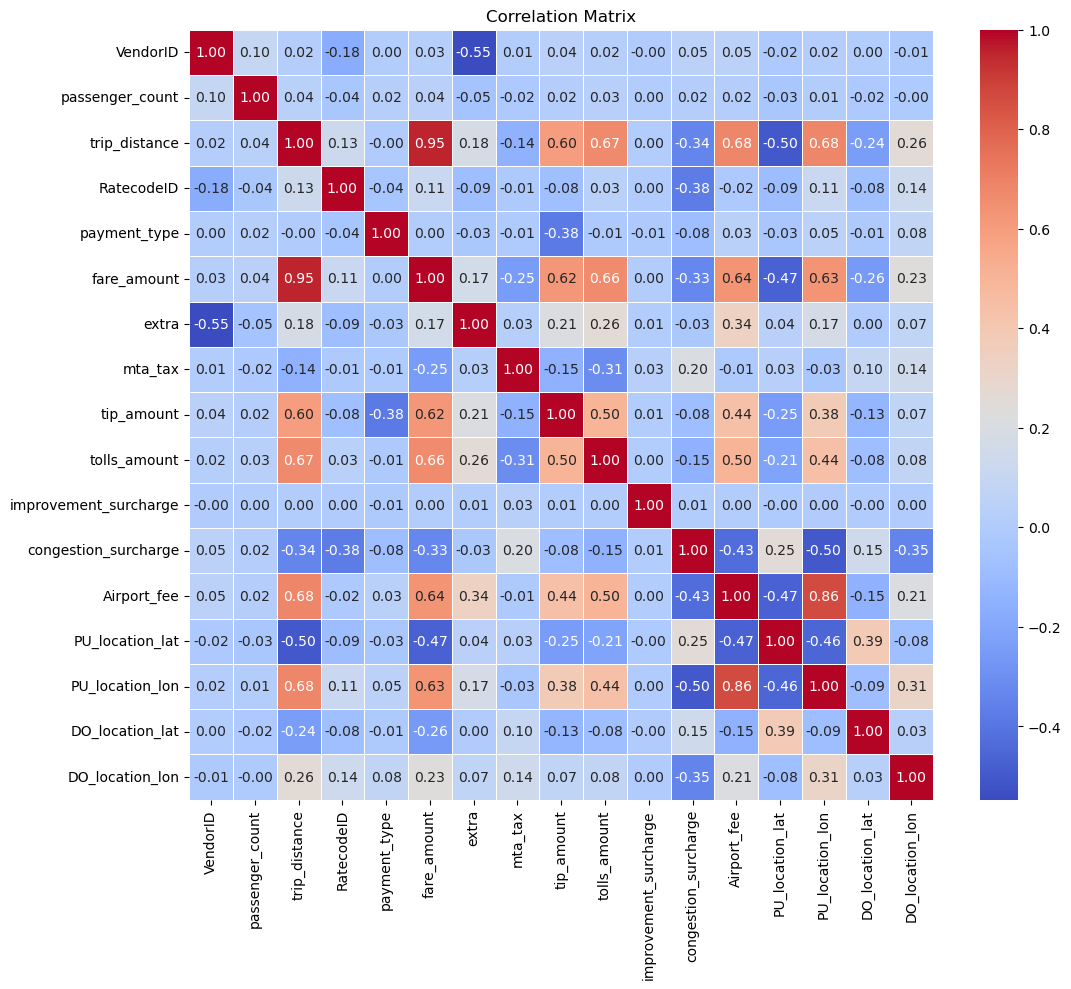

In [93]:
# Dropping non-numeric columns
dfTrain_numeric = dfTrain.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = dfTrain_numeric.corr()

# Plotting the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [94]:
corr_matrix['tip_amount'].sort_values(key= lambda x: abs(x), ascending=False)

tip_amount               1.000000
fare_amount              0.623595
trip_distance            0.600140
tolls_amount             0.500822
Airport_fee              0.439061
PU_location_lon          0.383503
payment_type            -0.378864
PU_location_lat         -0.247990
extra                    0.211149
mta_tax                 -0.152406
DO_location_lat         -0.128718
congestion_surcharge    -0.084581
RatecodeID              -0.081023
DO_location_lon          0.069843
VendorID                 0.044938
passenger_count          0.017716
improvement_surcharge    0.005529
Name: tip_amount, dtype: float64

### Histograms


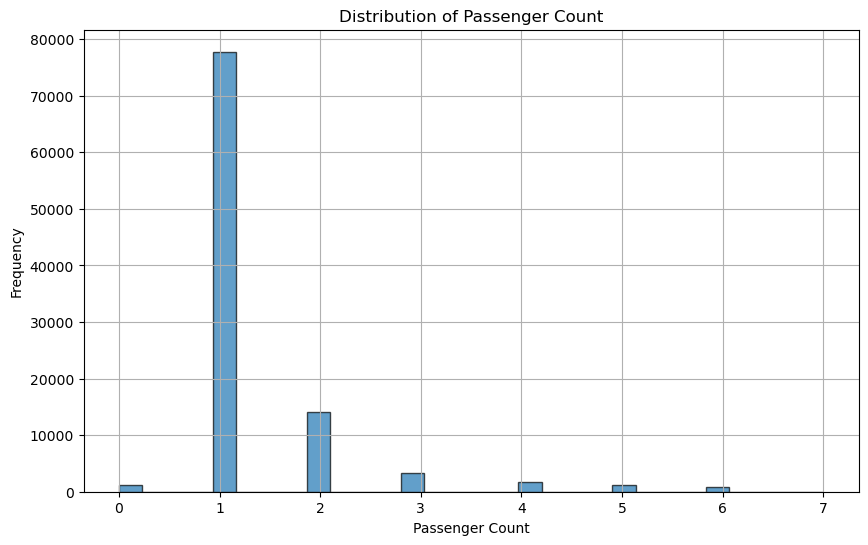

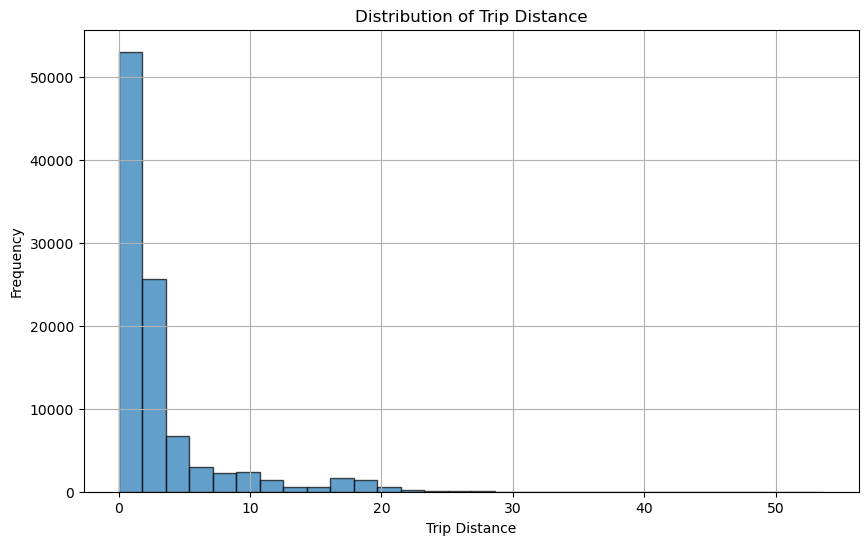

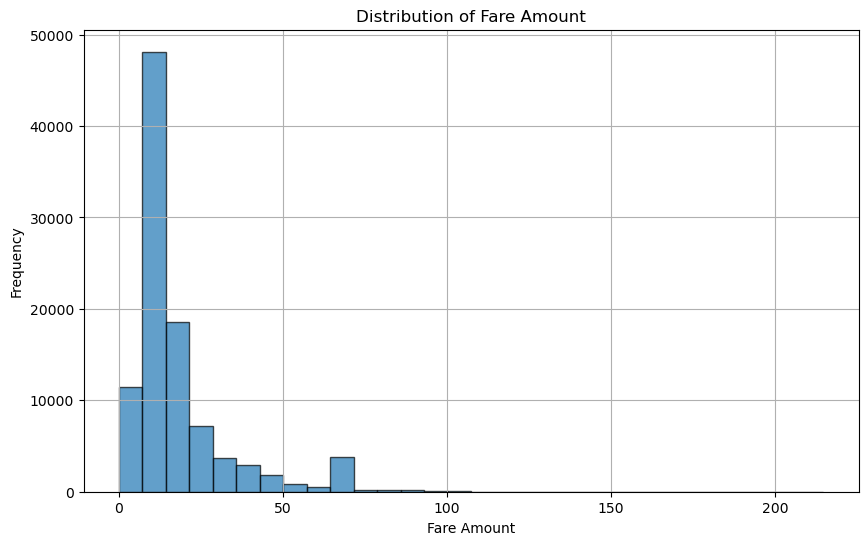

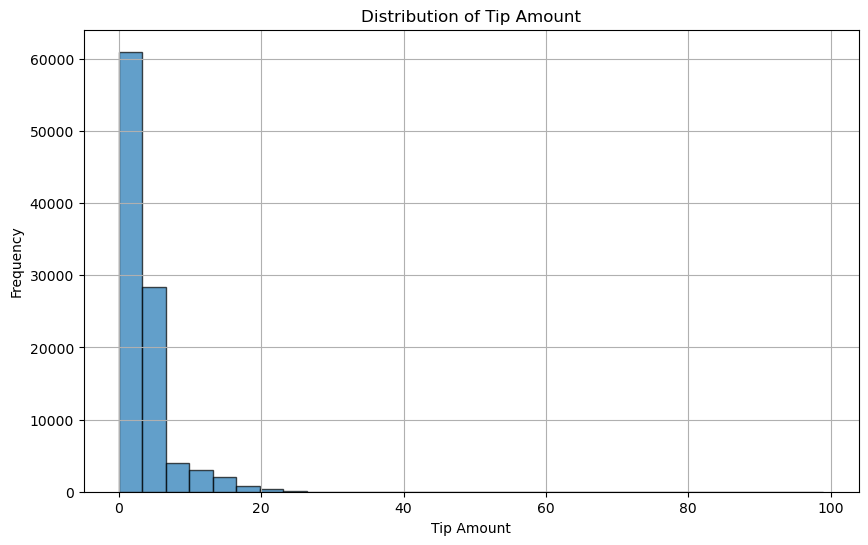

In [95]:
# Plotting passenger_count
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['passenger_count'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting trip_distance
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['trip_distance'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting fare_amount
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['fare_amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting tip_amount
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['tip_amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### ACP des Données


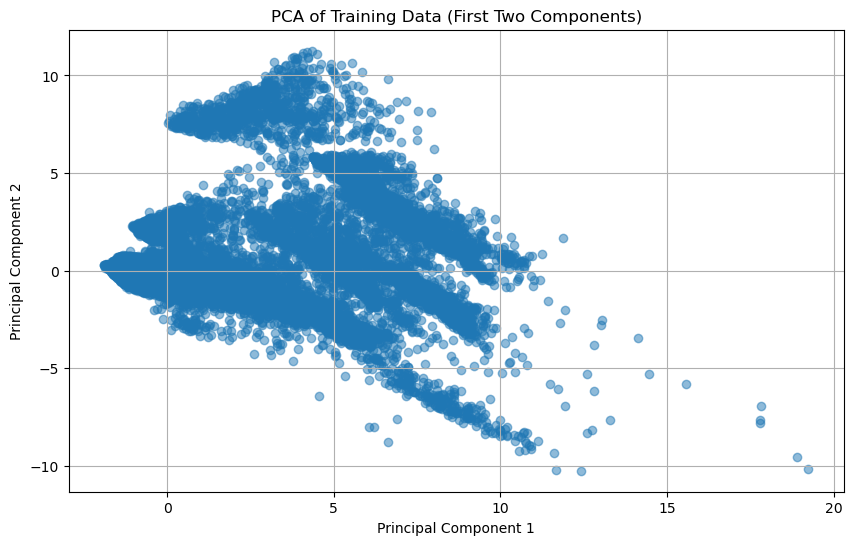

Explained variance by each principal component: [0.32451108 0.10510813 0.08985424 0.07662442 0.06747212]


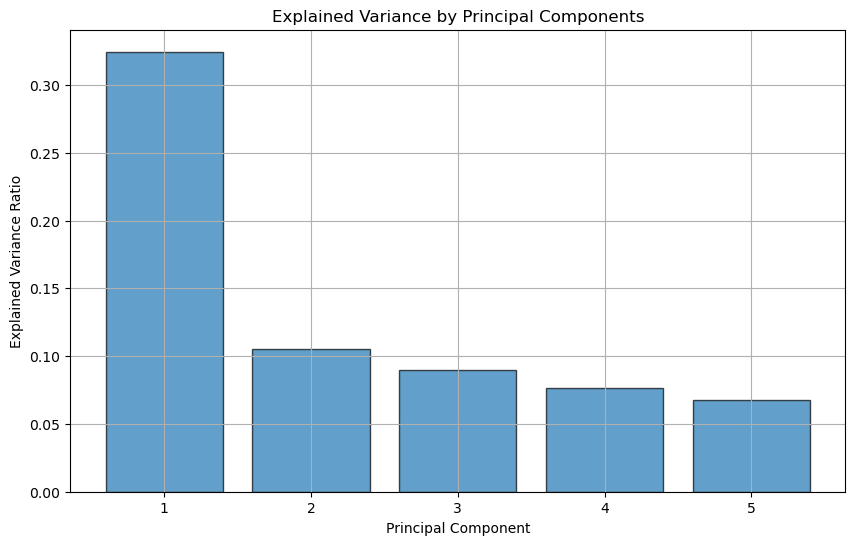

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(dfTrain.drop(columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'payment_type'])) #on enlève les colonnes non numériques

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_scaled)

# Applying PCA with more components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_train_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(5)])

# Plotting the PCA results for the first two components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.title('PCA of Training Data (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explained variance of PCA
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, edgecolor='k')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()





### Data Viz


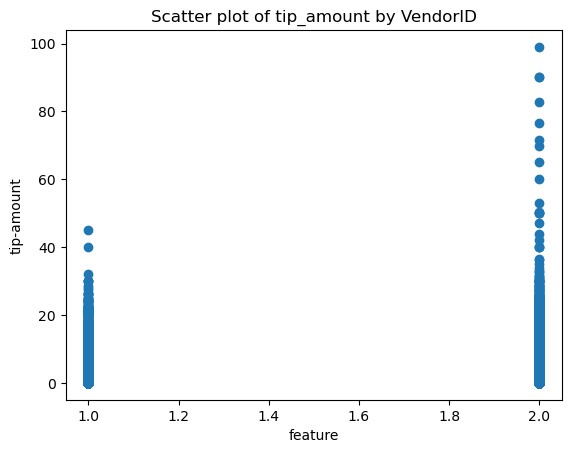

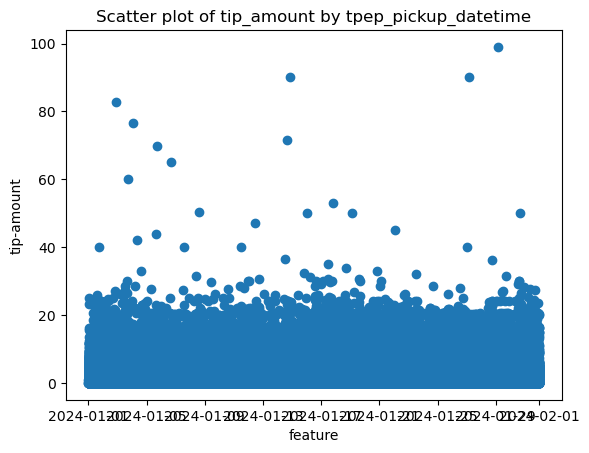

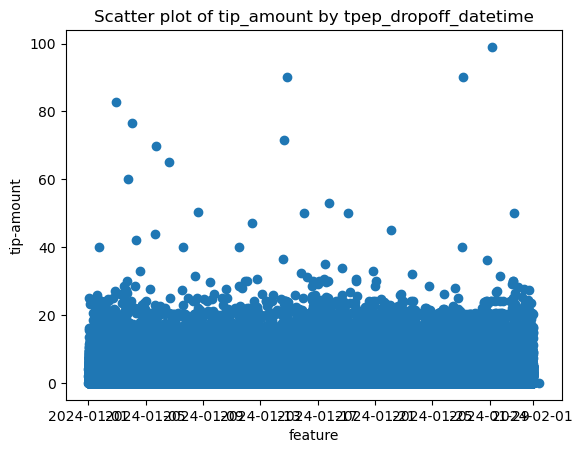

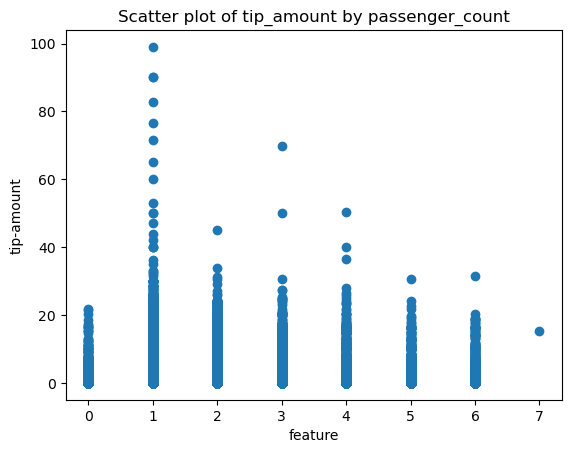

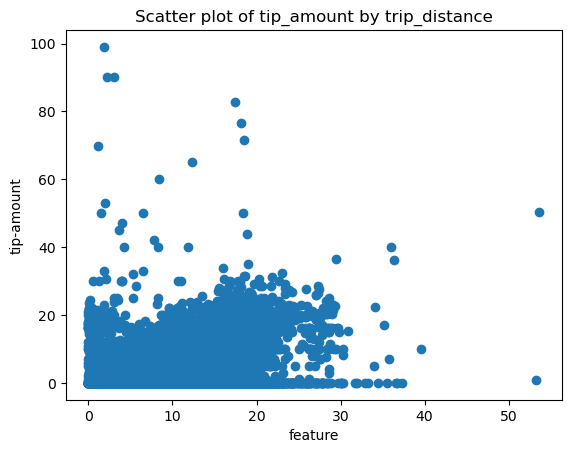

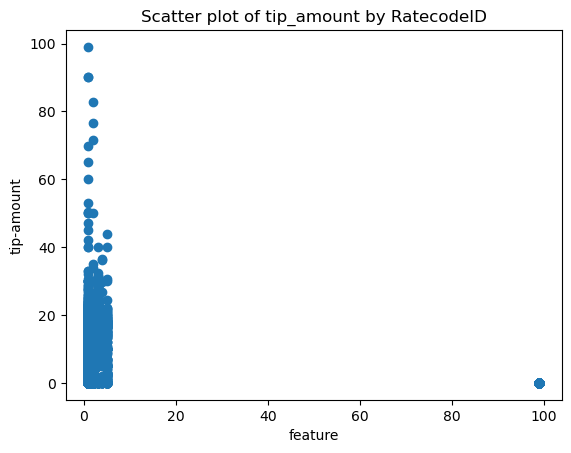

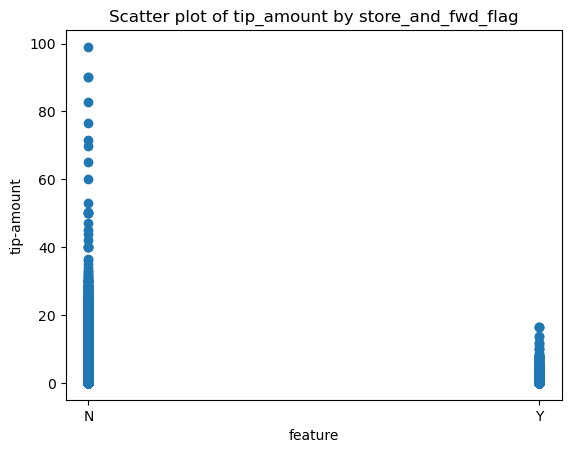

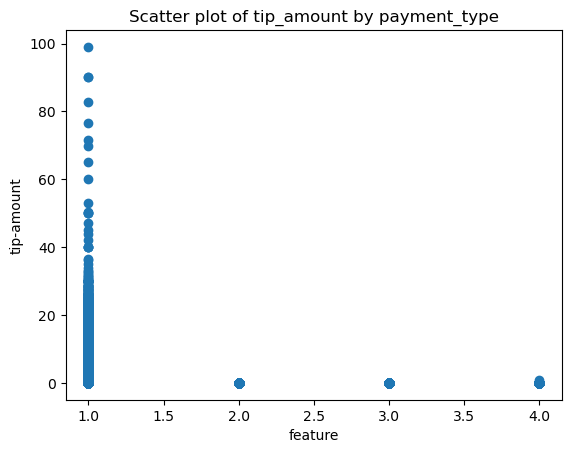

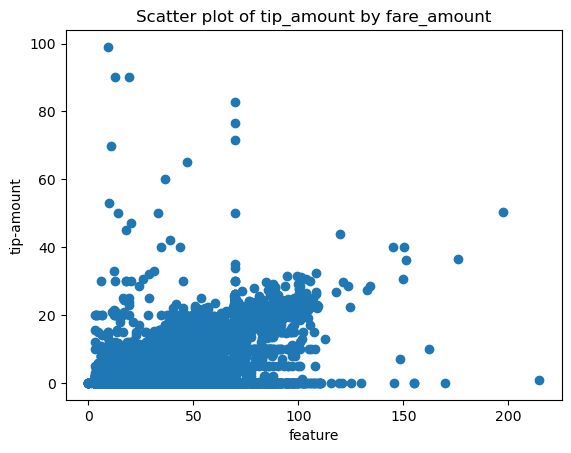

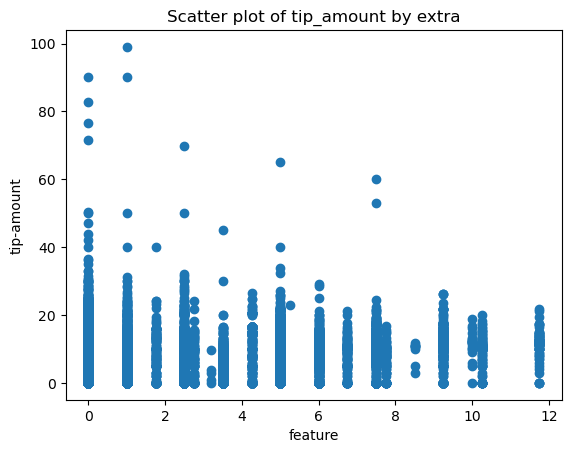

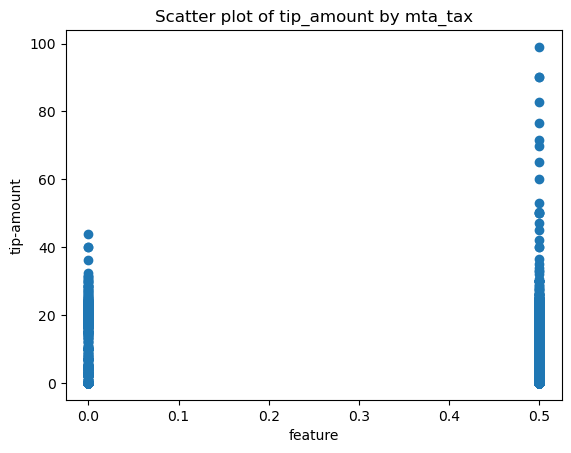

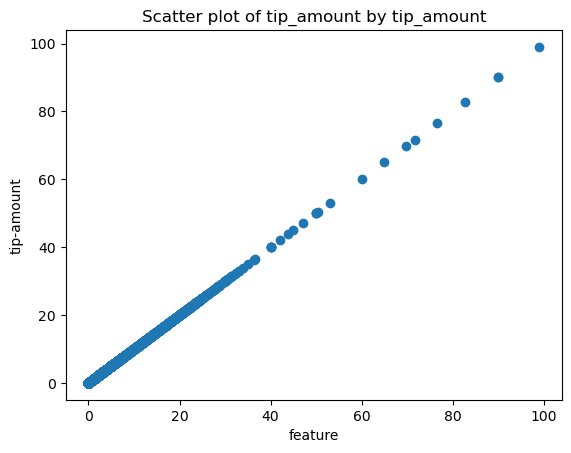

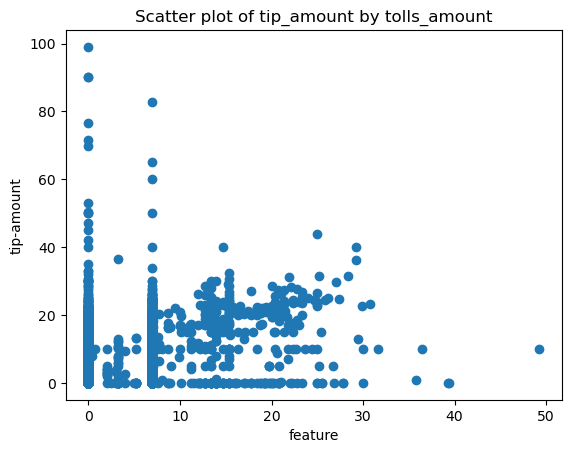

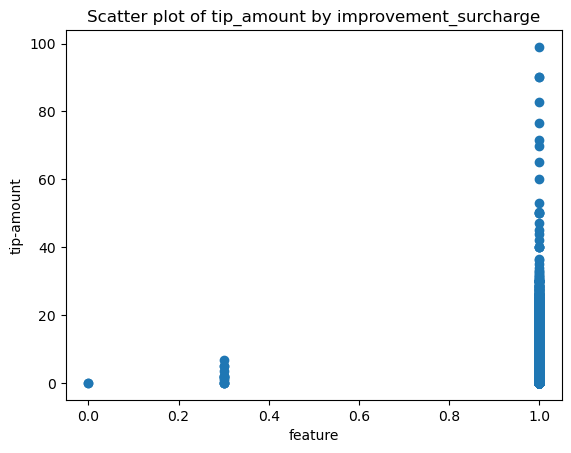

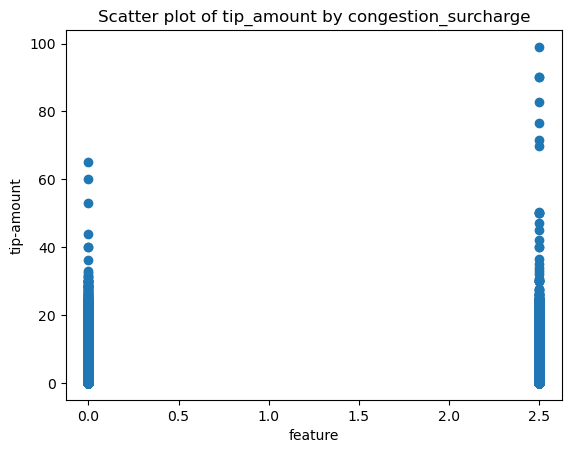

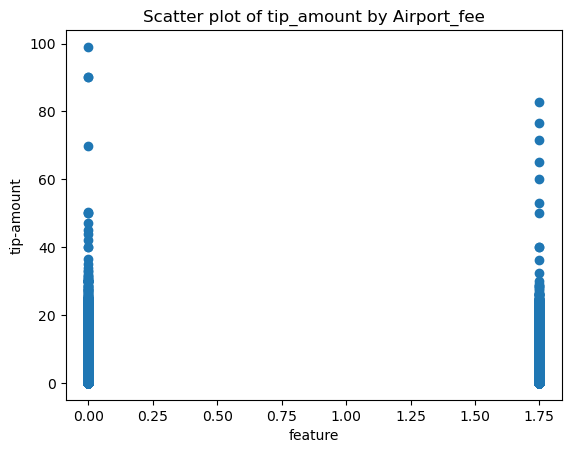

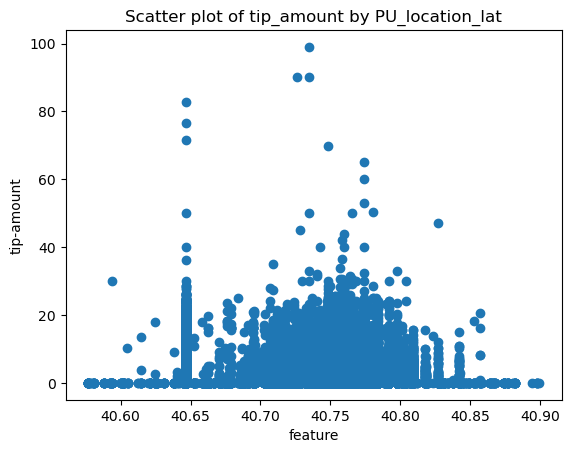

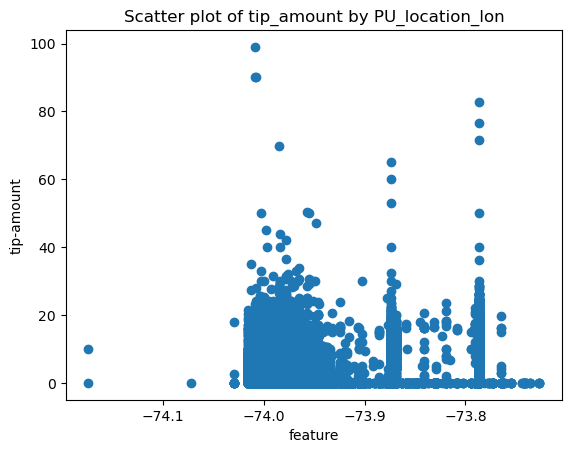

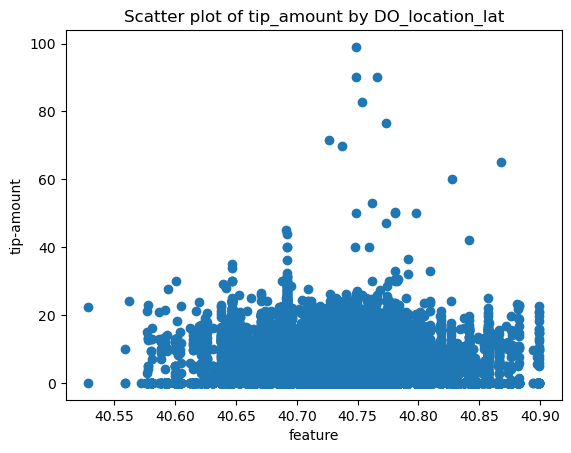

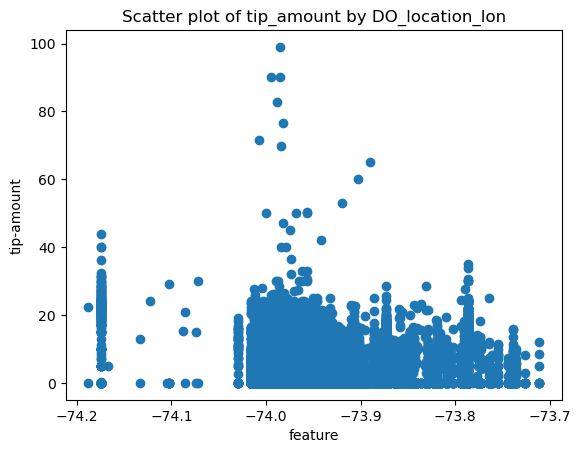

In [97]:
for feature in dfTrain.columns:
    plt.scatter(dfTrain[feature], dfTrain['tip_amount'])
    plt.ylabel('tip-amount')
    plt.xlabel('feature')
    plt.title(f"Scatter plot of tip_amount by {feature}")
    plt.show()

## Building Model


### Model implementation


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [99]:
regressor = RandomForestRegressor()

### Model Training/Fitting


In [100]:
features = ['VendorID',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'Airport_fee',
       'PU_location_lat', 'PU_location_lon', 'DO_location_lat',
       'DO_location_lon']

X_train = dfTrain[features]
X_test = dfTest[features]

In [101]:
y_train = dfTrain['tip_amount']

In [102]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [103]:
res = regressor.predict(X_train) - y_train

In [104]:
resRegressor = LinearRegression()

In [105]:
resRegressor.fit(X_train, res)

LinearRegression()

## Making predictions


### Predicting on test_set


In [106]:
predictions = regressor.predict(X_test) + resRegressor.predict(X_test)

In [107]:
predictions.shape

(2627163,)

### Saving prediction file


In [108]:
dfSubmission['tip_amount'] = predictions

In [109]:
dfSubmission.to_parquet(os.path.join(DATA_FOLDER, SUBMISSION_FILE_NAME))